In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# pull up the polyfit variables and x, y positions

p_fit = np.load('./dataFolder/3DpolyfitVariables.npy') #load the coefficients of the polyfit
X_arr = pd.read_csv('./dataFolder/x_proboscis_ordered')
X_arr = X_arr.drop(['Unnamed: 0'], axis=1)
Y_arr = pd.read_csv('./dataFolder/y_proboscis_ordered')
Y_arr = Y_arr.drop(['Unnamed: 0'], axis=1)
tangent = pd.read_csv('./dataFolder/ProboscisVector.csv')

### compute error angle

In [3]:
trackPoints = pd.read_csv('./dataFolder/MV_m1_points.csv')
trackPoints.head()

body_X      body_Y   nectary_X   nectary_Y  prob_base_X  prob_base_Y  \
0  388.078376  381.614068  372.227746  188.424715   381.619192   323.795071   
1  386.810000  386.980000  372.970000  188.000000   381.348241   327.728714   
2  383.100000  379.100000  373.950000  188.010000   378.548415   321.217857   
3  379.238602  381.156274  374.930000  188.010000   377.155303   323.250858   
4  378.700000  379.270000  374.940000  188.010000   376.495312   316.354012   

   prob_mid_X  prob_mid_Y    prob_1_X    prob_1_Y    prob_2_X    prob_2_Y  \
0  380.238266  277.537139  381.059690  314.190856  381.198874  307.238159   
1  379.416841  278.019424  380.405303  320.557345  380.743042  310.449771   
2  379.950000  278.000000  378.337121  315.709023  378.463881  309.847593   
3  376.815665  278.019424  377.226377  314.914284  378.008049  309.245416   
4  377.010000  278.000000  377.363281  312.985141  376.640553  306.635981   

     prob_3_X    prob_3_Y    prob_4_X    prob_4_Y    prob_5_X    prob_5_Y  
0  381.084916  300.212757  380.799242  293.442655  380.405303  287.157793  
1  380.743042  302.621466  380.306818  295.597465  380.208333  288.594333  
2  378.691797  301.216386  379.125000  295.238330  379.223485  286.080388  
3  377.096385  301.216386  377.253788  295.597465  376.859848  287.696495  
4  376.754511  300.614209  376.465909  294.699627  376.958333  287.157793

In [4]:
body =  trackPoints.loc[:, ['body_X', 'body_Y']].values
prob_base = trackPoints.loc[:, ['prob_base_X', 'prob_base_Y']].values

BodyHeadVector = prob_base - body

In [26]:
ProbVector = pd.DataFrame()
ProbVector['x'] = tangent.loc[:,'x2'] - tangent.loc[:,'x1']
ProbVector['y'] = tangent.loc[:,'y2'] - tangent.loc[:,'y1']
ProbVector = ProbVector.values

In [27]:
BodyHeadVector.size, ProbVector.size

(2000, 2000)

In [35]:
angle = []
for ii, pvec in enumerate(ProbVector):
    aa = np.arctan2(np.cross(pvec, BodyHeadVector[ii]), np.dot(pvec, BodyHeadVector[ii]))
    angle.append(aa)
    
pd.Series(data = angle).to_csv('./dataFolder/Tangent_errorAngle.csv')

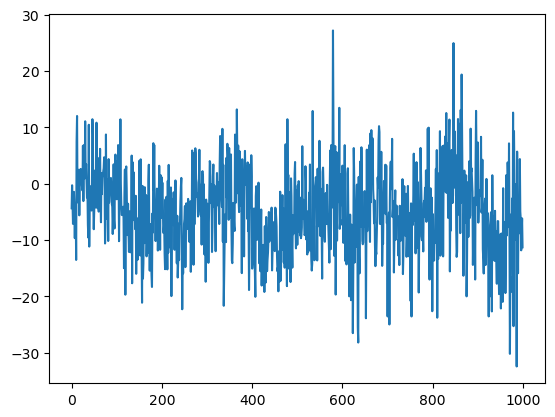

In [36]:
plt.plot(np.array(angle)*180/np.pi)